# Investigating lmsys chatbotarena dataset

## Downloading the dataset

In [ ]:
!pip install datasets

In [ ]:
from huggingface_hub import login
login()

from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
ds = load_dataset("lmsys/chatbot_arena_conversations")

## Understanding the Features

In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['question_id', 'model_a', 'model_b', 'winner', 'judge', 'conversation_a', 'conversation_b', 'turn', 'anony', 'language', 'tstamp', 'openai_moderation', 'toxic_chat_tag'],
        num_rows: 33000
    })
})


In [ ]:
ds['train'].features

{'question_id': Value(dtype='string', id=None),
 'model_a': Value(dtype='string', id=None),
 'model_b': Value(dtype='string', id=None),
 'winner': Value(dtype='string', id=None),
 'judge': Value(dtype='string', id=None),
 'conversation_a': [{'content': Value(dtype='string', id=None),
   'role': Value(dtype='string', id=None)}],
 'conversation_b': [{'content': Value(dtype='string', id=None),
   'role': Value(dtype='string', id=None)}],
 'turn': Value(dtype='int64', id=None),
 'anony': Value(dtype='bool', id=None),
 'language': Value(dtype='string', id=None),
 'tstamp': Value(dtype='float64', id=None),
 'openai_moderation': {'categories': {'harassment': Value(dtype='bool', id=None),
   'harassment/threatening': Value(dtype='bool', id=None),
   'hate': Value(dtype='bool', id=None),
   'hate/threatening': Value(dtype='bool', id=None),
   'self-harm': Value(dtype='bool', id=None),
   'self-harm/instructions': Value(dtype='bool', id=None),
   'self-harm/intent': Value(dtype='bool', id=None),

In [ ]:
import pandas as pd

df = pd.DataFrame(ds['train'])

In [ ]:
df.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,turn,anony,language,tstamp,openai_moderation,toxic_chat_tag
0,58210e39b3fd4441a2bd4a518bb44c2d,chatglm-6b,koala-13b,model_b,arena_user_973,[{'content': 'What is the difference between O...,[{'content': 'What is the difference between O...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil..."
1,2564acd09e3942fd97657d05282d4389,oasst-pythia-12b,alpaca-13b,tie,arena_user_973,[{'content': 'Why did my parent not invite me ...,[{'content': 'Why did my parent not invite me ...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil..."
2,90bfd142157948aba01931726c888e7f,koala-13b,oasst-pythia-12b,model_b,arena_user_973,"[{'content': 'Fuji vs. Nikon, which is better?...","[{'content': 'Fuji vs. Nikon, which is better?...",1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil..."
3,a7c5accc53e649a3bc6b2e41d962ebc4,vicuna-13b,oasst-pythia-12b,model_b,arena_user_973,[{'content': 'How to build an arena for chatbo...,[{'content': 'How to build an arena for chatbo...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil..."
4,adf27e819a3c494cb6e993f0c660e097,vicuna-13b,koala-13b,model_a,arena_user_973,"[{'content': 'When is it today?', 'role': 'use...","[{'content': 'When is it today?', 'role': 'use...",1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil..."


In [ ]:
print(f"Length of the dataset is {len(df)} rows")

Length of the dataset is 33000 rows


In [ ]:
print("\nColumn dtypes:\n", df.dtypes)


Column dtypes:
 question_id           object
model_a               object
model_b               object
winner                object
judge                 object
conversation_a        object
conversation_b        object
turn                   int64
anony                   bool
language              object
tstamp               float64
openai_moderation     object
toxic_chat_tag        object
dtype: object


In [ ]:
# Understanding conversation structure

first_conv = df['conversation_a'].iloc[0]
print(first_conv)

[{'content': 'What is the difference between OpenCL and CUDA?', 'role': 'user'}, {'content': 'OpenCL and CUDA are two different programming models that are used for parallel computing.OpenCL is a general-purpose并行编程接口 that allows developers to write parallel code that can run on any platform that supportsCL, which includes most modern operating systems and computer systems, including Windows, Linux, and macOS. It provides a lower-level, more flexible API that is more suitable for building large-scale distributed computing systems.CUDA is a specific implementation ofOpenCL that is designed for performance and scalability in devices with multiple GPU(s). It was developed by Nvidia and is widely used for scientific computing, machine learning, and图形图像处理. The CUDA API provides a high-level, more efficient way to write parallel code that can run on top of a GPU, while still maintaining the ability to write code that can be easily adapted for other parallel computing platforms.', 'role': 'as

In [ ]:
print("Type of conversation_a entry:", type(first_conv))
print("Keys of a single turn dict:", first_conv[0].keys())

Type of conversation_a entry: <class 'list'>
Keys of a single turn dict: dict_keys(['content', 'role'])


In [ ]:
first_turn = first_conv[0]
print("Role:", first_turn['role'])
print("Content:", first_turn['content'])

Role: user
Content: What is the difference between OpenCL and CUDA?


In [ ]:
second_turn = first_conv[1]
print("Role:", second_turn['role'])
print("Content:", second_turn['content'])

Role: assistant
Content: OpenCL and CUDA are two different programming models that are used for parallel computing.OpenCL is a general-purpose并行编程接口 that allows developers to write parallel code that can run on any platform that supportsCL, which includes most modern operating systems and computer systems, including Windows, Linux, and macOS. It provides a lower-level, more flexible API that is more suitable for building large-scale distributed computing systems.CUDA is a specific implementation ofOpenCL that is designed for performance and scalability in devices with multiple GPU(s). It was developed by Nvidia and is widely used for scientific computing, machine learning, and图形图像处理. The CUDA API provides a high-level, more efficient way to write parallel code that can run on top of a GPU, while still maintaining the ability to write code that can be easily adapted for other parallel computing platforms.


In [ ]:
data = df.copy()

data['prompt'] = df['conversation_a'].apply(lambda x: x[0]['content'] if x else '')

data.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,turn,anony,language,tstamp,openai_moderation,toxic_chat_tag,prompt
0,58210e39b3fd4441a2bd4a518bb44c2d,chatglm-6b,koala-13b,model_b,arena_user_973,[{'content': 'What is the difference between O...,[{'content': 'What is the difference between O...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",What is the difference between OpenCL and CUDA?
1,2564acd09e3942fd97657d05282d4389,oasst-pythia-12b,alpaca-13b,tie,arena_user_973,[{'content': 'Why did my parent not invite me ...,[{'content': 'Why did my parent not invite me ...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",Why did my parent not invite me to their wedding?
2,90bfd142157948aba01931726c888e7f,koala-13b,oasst-pythia-12b,model_b,arena_user_973,"[{'content': 'Fuji vs. Nikon, which is better?...","[{'content': 'Fuji vs. Nikon, which is better?...",1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...","Fuji vs. Nikon, which is better?"
3,a7c5accc53e649a3bc6b2e41d962ebc4,vicuna-13b,oasst-pythia-12b,model_b,arena_user_973,[{'content': 'How to build an arena for chatbo...,[{'content': 'How to build an arena for chatbo...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",How to build an arena for chatbots?
4,adf27e819a3c494cb6e993f0c660e097,vicuna-13b,koala-13b,model_a,arena_user_973,"[{'content': 'When is it today?', 'role': 'use...","[{'content': 'When is it today?', 'role': 'use...",1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",When is it today?


In [ ]:
# Understanding toxic_chat_tag

print(df['toxic_chat_tag'].head(5))

0    {'roberta-large': {'flagged': False, 'probabil...
1    {'roberta-large': {'flagged': False, 'probabil...
2    {'roberta-large': {'flagged': False, 'probabil...
3    {'roberta-large': {'flagged': False, 'probabil...
4    {'roberta-large': {'flagged': False, 'probabil...
Name: toxic_chat_tag, dtype: object


In [ ]:
df['toxic_chat_tag'].iloc[0]

{'roberta-large': {'flagged': False, 'probability': 0.008313022553920746},
 't5-large': {'flagged': False, 'score': 7.943665219245499e-05}}

In [ ]:
tag = df['toxic_chat_tag'].iloc[0]
print(tag)


{'roberta-large': {'flagged': False, 'probability': 0.008313022553920746}, 't5-large': {'flagged': False, 'score': 7.943665219245499e-05}}


In [ ]:
# RoBERTa flags
roberta_flags = df['toxic_chat_tag'].apply(lambda x: x['roberta-large']['flagged'])
roberta_counts = roberta_flags.value_counts()
print("RoBERTa ‘flagged’ counts:")
print(roberta_counts, "\n")

# T5 flags
t5_flags   = df['toxic_chat_tag'].apply(lambda x: x['t5-large']['flagged'])
t5_counts  = t5_flags.value_counts()
print("T5 ‘flagged’ counts:")
print(t5_counts)

RoBERTa ‘flagged’ counts:
toxic_chat_tag
False    32482
True       518
Name: count, dtype: int64 

T5 ‘flagged’ counts:
toxic_chat_tag
False    32497
True       503
Name: count, dtype: int64


For each row we get one toxicity probability and one toxicity score that was computed over the entire conversation. This probably means that the score and the probability should be calculated for the prompt plus both model‑A and model‑B outputs.

In [ ]:
data['toxicity_roberta'] = df['toxic_chat_tag'].apply(lambda x: x['roberta-large']['probability'])
data['toxicity_t5'] = df['toxic_chat_tag'].apply(lambda x: x['t5-large']['score'])
data.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,turn,anony,language,tstamp,openai_moderation,toxic_chat_tag,prompt,toxicity_roberta,toxicity_t5
0,58210e39b3fd4441a2bd4a518bb44c2d,chatglm-6b,koala-13b,model_b,arena_user_973,[{'content': 'What is the difference between O...,[{'content': 'What is the difference between O...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",What is the difference between OpenCL and CUDA?,0.008313,0.000079
1,2564acd09e3942fd97657d05282d4389,oasst-pythia-12b,alpaca-13b,tie,arena_user_973,[{'content': 'Why did my parent not invite me ...,[{'content': 'Why did my parent not invite me ...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",Why did my parent not invite me to their wedding?,0.038767,0.001776
2,90bfd142157948aba01931726c888e7f,koala-13b,oasst-pythia-12b,model_b,arena_user_973,"[{'content': 'Fuji vs. Nikon, which is better?...","[{'content': 'Fuji vs. Nikon, which is better?...",1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...","Fuji vs. Nikon, which is better?",0.025917,0.000194
3,a7c5accc53e649a3bc6b2e41d962ebc4,vicuna-13b,oasst-pythia-12b,model_b,arena_user_973,[{'content': 'How to build an arena for chatbo...,[{'content': 'How to build an arena for chatbo...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",How to build an arena for chatbots?,0.021092,0.000324
4,adf27e819a3c494cb6e993f0c660e097,vicuna-13b,koala-13b,model_a,arena_user_973,"[{'content': 'When is it today?', 'role': 'use...","[{'content': 'When is it today?', 'role': 'use...",1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",When is it today?,0.010605,0.000166


In [ ]:
# Understanding turn

print(df['turn'].value_counts().sort_index())

turn
1     29126
2      2557
3       785
4       289
5       108
6        56
7        31
8        18
9        13
10        8
11        2
12        2
13        2
15        1
19        1
25        1
Name: count, dtype: int64


In [ ]:
for t in sorted(df['turn'].unique()):
    sample = df[df['turn'] == t].iloc[0]
    len_a = len(sample['conversation_a'])
    len_b = len(sample['conversation_b'])
    print(f"turn={t} → conversation_a has {len_a} messages, conversation_b has {len_b}, the turn value is {sample['turn']}")

turn=1 → conversation_a has 2 messages, conversation_b has 2, the turn value is 1
turn=2 → conversation_a has 4 messages, conversation_b has 4, the turn value is 2
turn=3 → conversation_a has 6 messages, conversation_b has 6, the turn value is 3
turn=4 → conversation_a has 8 messages, conversation_b has 8, the turn value is 4
turn=5 → conversation_a has 10 messages, conversation_b has 10, the turn value is 5
turn=6 → conversation_a has 12 messages, conversation_b has 12, the turn value is 6
turn=7 → conversation_a has 14 messages, conversation_b has 14, the turn value is 7
turn=8 → conversation_a has 16 messages, conversation_b has 16, the turn value is 8
turn=9 → conversation_a has 18 messages, conversation_b has 18, the turn value is 9
turn=10 → conversation_a has 20 messages, conversation_b has 20, the turn value is 10
turn=11 → conversation_a has 22 messages, conversation_b has 22, the turn value is 11
turn=12 → conversation_a has 24 messages, conversation_b has 24, the turn value 

Turn represents the number of user–assistant exchanges where 1 exchange = 1 user prompt + 1 model response

In [ ]:
# Investigating the language feature

lang_counts = df['language'].value_counts(dropna=False)
print(lang_counts)

print(lang_counts['unknown'])

language
English       29206
German          676
Spanish         576
French          446
Portuguese      299
              ...  
Hindi             1
Swahili           1
Cebuano           1
Tigrinya          1
Yoruba            1
Name: count, Length: 96, dtype: int64
234


In [ ]:
lang_list = df['language'].value_counts().index.tolist()
print(lang_list)
print(len(lang_list))

['English', 'German', 'Spanish', 'French', 'Portuguese', 'Russian', 'unknown', 'Chinese', 'Italian', 'Dutch', 'Japanese', 'Polish', 'Korean', 'Finnish', 'Danish', 'Latin', 'Turkish', 'Indonesian', 'Czech', 'Ukrainian', 'Vietnamese', 'Scots', 'Hebrew', 'Swedish', 'Hungarian', 'Arabic', 'Norwegian', 'Slovak', 'Galician', 'Slovenian', 'Persian', 'Greek', 'Romanian', 'Thai', 'Esperanto', 'Catalan', 'Luxembourgish', 'Bulgarian', 'Norwegian Nynorsk', 'Serbian', 'Malay', 'Afrikaans', 'Maltese', 'Bislama', 'Tsonga', 'Corsican', 'Interlingua', 'Latvian', 'Estonian', 'Xhosa', 'Kinyarwanda', 'Waray', 'Maori', 'Occitan', 'Hawaiian', 'Icelandic', 'Southern Sotho', 'Shona', 'Uzbek', 'Hmong', 'Quechua', 'Croatian', 'Malagasy', 'Aymara', 'Macedonian', 'Afar', 'Faroese', 'Ganda', 'Sanskrit', 'Akan', 'Wolof', 'Oromo', 'Lithuanian', 'zzp', 'Manx', 'Welsh', 'Tswana', 'Irish', 'Kalaallisut', 'Haitian Creole', 'Basque', 'Volapük', 'Fijian', 'Western Frisian', 'Somali', 'Interlingue', 'Sundanese', 'Bangla', 

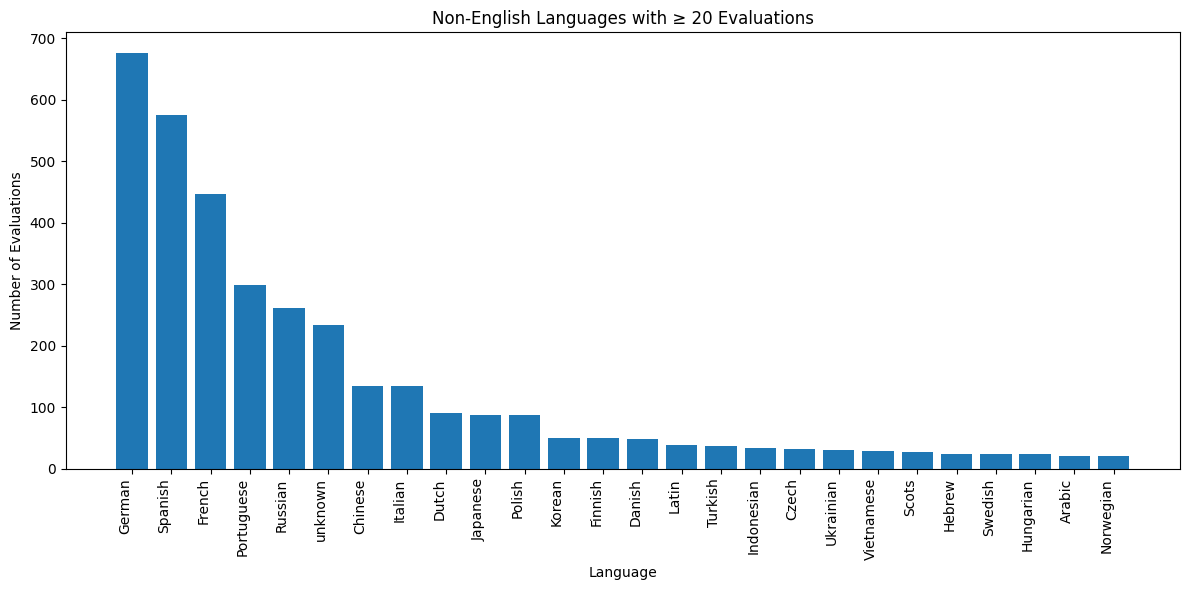

Languages appearing fewer than 20 times:
 ['Slovak', 'Galician', 'Slovenian', 'Persian', 'Greek', 'Romanian', 'Thai', 'Esperanto', 'Catalan', 'Luxembourgish', 'Bulgarian', 'Norwegian Nynorsk', 'Serbian', 'Malay', 'Afrikaans', 'Maltese', 'Bislama', 'Tsonga', 'Corsican', 'Interlingua', 'Latvian', 'Estonian', 'Xhosa', 'Kinyarwanda', 'Waray', 'Maori', 'Occitan', 'Hawaiian', 'Icelandic', 'Southern Sotho', 'Shona', 'Uzbek', 'Hmong', 'Quechua', 'Croatian', 'Malagasy', 'Aymara', 'Macedonian', 'Afar', 'Faroese', 'Ganda', 'Sanskrit', 'Akan', 'Wolof', 'Oromo', 'Lithuanian', 'zzp', 'Manx', 'Welsh', 'Tswana', 'Irish', 'Kalaallisut', 'Haitian Creole', 'Basque', 'Volapük', 'Fijian', 'Western Frisian', 'Somali', 'Interlingue', 'Sundanese', 'Bangla', 'Klingon', 'Guarani', 'Tatar', 'Hindi', 'Swahili', 'Cebuano', 'Tigrinya', 'Yoruba']


In [ ]:
import matplotlib.pyplot as plt

lang_counts = df['language'].value_counts()
non_eng    = lang_counts.drop(labels=['English'], errors='ignore')

uncommon_langs = non_eng[non_eng <  20].index.tolist()
common_langs  = non_eng[non_eng >= 20]

plt.figure(figsize=(12,6))
plt.bar(common_langs.index, common_langs.values)
plt.xlabel("Language")
plt.ylabel("Number of Evaluations")
plt.title("Non‑English Languages with ≥ 20 Evaluations")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

print("Languages appearing fewer than 20 times:\n", uncommon_langs)

In [ ]:
# Understanding openai_moderation

first_mod = df['openai_moderation'].iloc[0]
first_mod

{'categories': {'harassment': False,
  'harassment/threatening': False,
  'hate': False,
  'hate/threatening': False,
  'self-harm': False,
  'self-harm/instructions': False,
  'self-harm/intent': False,
  'sexual': False,
  'sexual/minors': False,
  'violence': False,
  'violence/graphic': False},
 'category_scores': {'harassment': 2.8765102e-05,
  'harassment/threatening': 5.663866e-07,
  'hate': 5.574919e-06,
  'hate/threatening': 2.3965333e-08,
  'self-harm': 5.1901172e-09,
  'self-harm/instructions': 1.1517327e-08,
  'self-harm/intent': 3.9070875e-09,
  'sexual': 4.381485e-06,
  'sexual/minors': 5.541973e-08,
  'violence': 2.2985896e-06,
  'violence/graphic': 4.8212314e-07},
 'flagged': False}

In [ ]:
print("Top‑level keys:", list(first_mod.keys()))
print("Category flags:", list(first_mod['categories'].keys()))
print("Category scores:", list(first_mod['category_scores'].keys()))

Top‑level keys: ['categories', 'category_scores', 'flagged']
Category flags: ['harassment', 'harassment/threatening', 'hate', 'hate/threatening', 'self-harm', 'self-harm/instructions', 'self-harm/intent', 'sexual', 'sexual/minors', 'violence', 'violence/graphic']
Category scores: ['harassment', 'harassment/threatening', 'hate', 'hate/threatening', 'self-harm', 'self-harm/instructions', 'self-harm/intent', 'sexual', 'sexual/minors', 'violence', 'violence/graphic']


In [ ]:
data['self_harm_score'] = df['openai_moderation'].apply(lambda x: x['category_scores']['self-harm'])
data['harassment_score'] = df['openai_moderation'].apply(lambda x: x['category_scores']['harassment'])
data['hate_score'] = df['openai_moderation'].apply(lambda x: x['category_scores']['hate'])

print(data['self_harm_score'].describe(), "\n")
print(data['harassment_score'].describe(), "\n")
print(data['hate_score'].describe())

count    3.300000e+04
mean     9.262991e-05
std      2.477117e-03
min      2.387944e-13
25%      7.158275e-09
50%      7.163780e-08
75%      7.960470e-07
max      1.767990e-01
Name: self_harm_score, dtype: float64 

count    3.300000e+04
mean     1.240903e-03
std      1.161033e-02
min      1.780624e-10
25%      1.427871e-06
50%      1.025365e-05
75%      8.091360e-05
max      3.519106e-01
Name: harassment_score, dtype: float64 

count    3.300000e+04
mean     3.137323e-04
std      4.143785e-03
min      9.577752e-12
25%      4.283681e-07
50%      2.974364e-06
75%      2.235562e-05
max      3.098802e-01
Name: hate_score, dtype: float64


In [ ]:
data['openai_flagged'] = df['openai_moderation'].apply(lambda x: x['flagged'])

print(data['openai_flagged'].unique())

[False]


In [ ]:
data.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,turn,anony,language,tstamp,openai_moderation,toxic_chat_tag,prompt,toxicity_roberta,toxicity_t5,self_harm_score,harassment_score,hate_score,openai_flagged
0,58210e39b3fd4441a2bd4a518bb44c2d,chatglm-6b,koala-13b,model_b,arena_user_973,[{'content': 'What is the difference between O...,[{'content': 'What is the difference between O...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",What is the difference between OpenCL and CUDA?,0.008313,0.000079,5.190117e-09,2.876510e-05,5.574919e-06,False
1,2564acd09e3942fd97657d05282d4389,oasst-pythia-12b,alpaca-13b,tie,arena_user_973,[{'content': 'Why did my parent not invite me ...,[{'content': 'Why did my parent not invite me ...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",Why did my parent not invite me to their wedding?,0.038767,0.001776,2.419850e-06,4.390926e-05,3.183050e-05,False
2,90bfd142157948aba01931726c888e7f,koala-13b,oasst-pythia-12b,model_b,arena_user_973,"[{'content': 'Fuji vs. Nikon, which is better?...","[{'content': 'Fuji vs. Nikon, which is better?...",1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...","Fuji vs. Nikon, which is better?",0.025917,0.000194,8.200694e-09,3.713927e-06,9.442238e-08,False
3,a7c5accc53e649a3bc6b2e41d962ebc4,vicuna-13b,oasst-pythia-12b,model_b,arena_user_973,[{'content': 'How to build an arena for chatbo...,[{'content': 'How to build an arena for chatbo...,1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",How to build an arena for chatbots?,0.021092,0.000324,5.207706e-10,1.311850e-06,3.351851e-07,False
4,adf27e819a3c494cb6e993f0c660e097,vicuna-13b,koala-13b,model_a,arena_user_973,"[{'content': 'When is it today?', 'role': 'use...","[{'content': 'When is it today?', 'role': 'use...",1,True,English,1.682352e+09,"{'categories': {'harassment': False, 'harassme...","{'roberta-large': {'flagged': False, 'probabil...",When is it today?,0.010605,0.000166,2.988768e-09,2.569453e-07,7.735600e-07,False


In [ ]:
# Understanding anony

print(df['anony'].unique())

[ True]


In Chatbot Arena’s blind evaluation setup, users compare responses from two anonymous AI chatbots without knowing which model produced which answer​. This is what that refers to.

In [ ]:
# Understanding tstamp

print(df['tstamp'].head())

0    1.682352e+09
1    1.682352e+09
2    1.682352e+09
3    1.682352e+09
4    1.682352e+09
Name: tstamp, dtype: float64


In [ ]:
data['datetime'] = pd.to_datetime(df['tstamp'], unit='s')

data['hour']      = data['datetime'].dt.hour
data['weekday']   = data['datetime'].dt.day_name()
data['date']      = data['datetime'].dt.date

data.head()

,question_id,model_a,model_b,winner,judge,conversation_a,conversation_b,turn,anony,language,...,toxicity_roberta,toxicity_t5,self_harm_score,harassment_score,hate_score,openai_flagged,datetime,hour,weekday,date
0,58210e39b3fd4441a2bd4a518bb44c2d,chatglm-6b,koala-13b,model_b,arena_user_973,[{'content': 'What is the difference between O...,[{'content': 'What is the difference between O...,1,True,English,...,0.008313,0.000079,5.190117e-09,2.876510e-05,5.574919e-06,False,2023-04-24 15:53:11.132200003,15,Monday,2023-04-24
1,2564acd09e3942fd97657d05282d4389,oasst-pythia-12b,alpaca-13b,tie,arena_user_973,[{'content': 'Why did my parent not invite me ...,[{'content': 'Why did my parent not invite me ...,1,True,English,...,0.038767,0.001776,2.419850e-06,4.390926e-05,3.183050e-05,False,2023-04-24 15:54:14.674700022,15,Monday,2023-04-24
2,90bfd142157948aba01931726c888e7f,koala-13b,oasst-pythia-12b,model_b,arena_user_973,"[{'content': 'Fuji vs. Nikon, which is better?...","[{'content': 'Fuji vs. Nikon, which is better?...",1,True,English,...,0.025917,0.000194,8.200694e-09,3.713927e-06,9.442238e-08,False,2023-04-24 15:55:08.935100079,15,Monday,2023-04-24
3,a7c5accc53e649a3bc6b2e41d962ebc4,vicuna-13b,oasst-pythia-12b,model_b,arena_user_973,[{'content': 'How to build an arena for chatbo...,[{'content': 'How to build an arena for chatbo...,1,True,English,...,0.021092,0.000324,5.207706e-10,1.311850e-06,3.351851e-07,False,2023-04-24 15:56:25.192199945,15,Monday,2023-04-24
4,adf27e819a3c494cb6e993f0c660e097,vicuna-13b,koala-13b,model_a,arena_user_973,"[{'content': 'When is it today?', 'role': 'use...","[{'content': 'When is it today?', 'role': 'use...",1,True,English,...,0.010605,0.000166,2.988768e-09,2.569453e-07,7.735600e-07,False,2023-04-24 15:58:11.660300016,15,Monday,2023-04-24


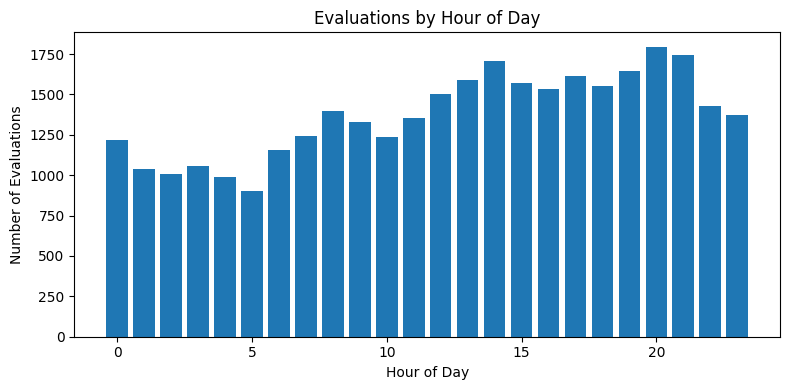

In [ ]:
import matplotlib.pyplot as plt

hour_counts = data['hour'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Evaluations")
plt.title("Evaluations by Hour of Day")
plt.tight_layout()
plt.show()

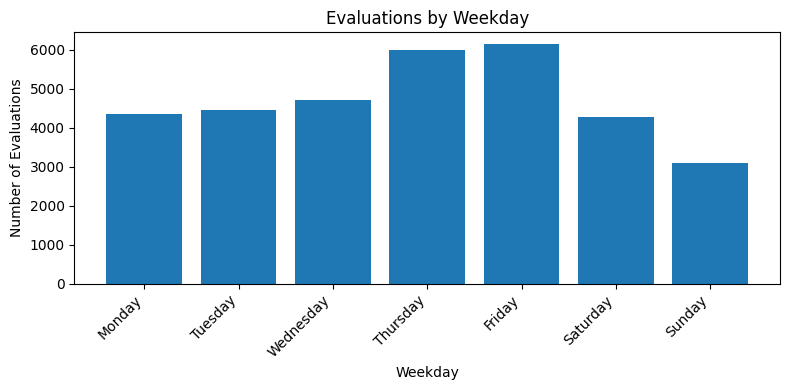

In [ ]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
weekday_counts = data['weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(8, 4))
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel("Weekday")
plt.ylabel("Number of Evaluations")
plt.title("Evaluations by Weekday")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Investigating models and judges

In [ ]:
all_models = pd.concat([df['model_a'], df['model_b']]).unique()
print("Total unique models:", len(all_models))

Total unique models: 20


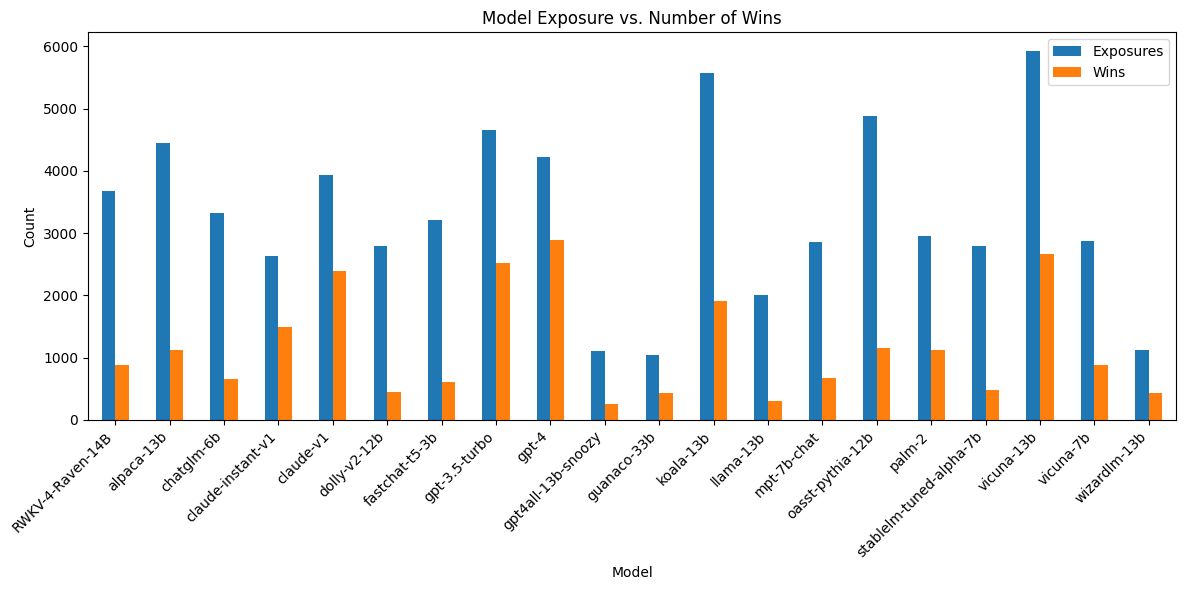

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

exposures = pd.concat([df['model_a'], df['model_b']]).value_counts()

df_wins = df[df['winner'].isin(['model_a', 'model_b'])].copy()
df_wins['winner_model'] = df_wins.apply(
    lambda row: row['model_a'] if row['winner'] == 'model_a' else row['model_b'],
    axis=1
)
win_counts = df_wins['winner_model'].value_counts()

stats = pd.DataFrame({
    'Exposures': exposures,
    'Wins': win_counts
}).fillna(0)

stats.plot(
    kind='bar',
    figsize=(12, 6)
)
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Model Exposure vs. Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.legend(title='')
plt.tight_layout()
plt.show()


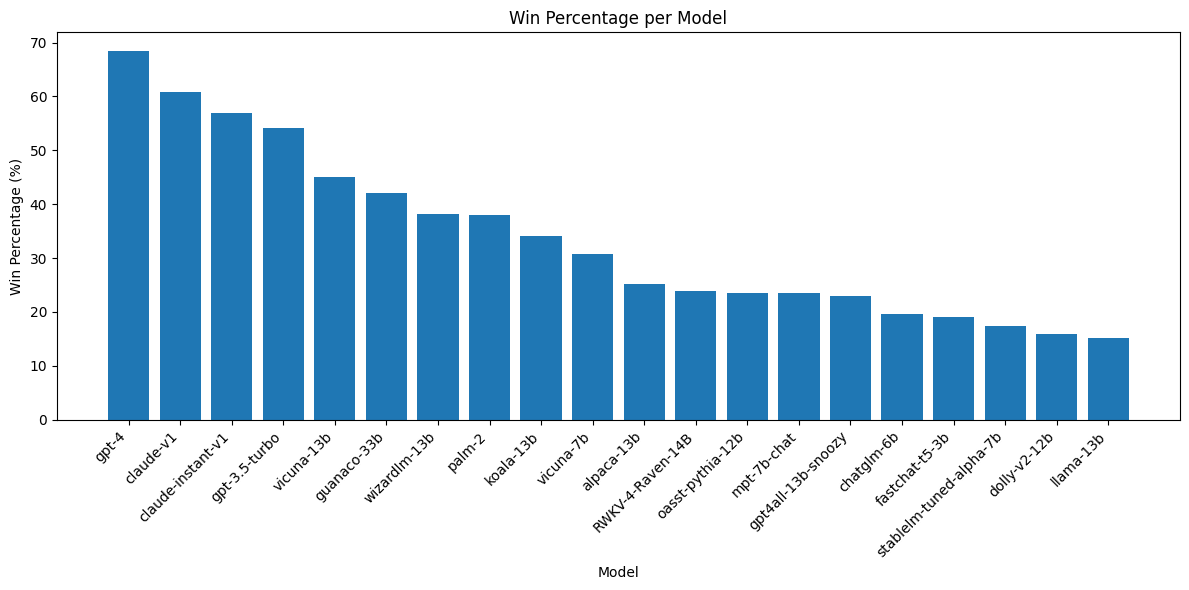

In [ ]:
win_pct = (win_counts / exposures) * 100
win_pct = win_pct.sort_values(ascending=False)

# 4. Plot win percentage
plt.figure(figsize=(12, 6))
plt.bar(win_pct.index, win_pct.values)
plt.xlabel("Model")
plt.ylabel("Win Percentage (%)")
plt.title("Win Percentage per Model")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
unique_judges = df['judge'].nunique()
print(f"Total unique judges: {unique_judges}")

Total unique judges: 13383


In [ ]:
# Judges that were most active

judge_counts = df['judge'].value_counts()
print(judge_counts.head(10))

judge
arena_user_9965     380
arena_user_257      292
arena_user_15085    288
arena_user_13046    265
arena_user_11473    201
arena_user_3820     197
arena_user_6467     131
arena_user_9676     122
arena_user_6585     107
arena_user_1338     106
Name: count, dtype: int64


In [ ]:
print(df['winner'].unique())
print(df[['winner', 'model_a', 'model_b']].head(5))

['model_b' 'tie' 'model_a' 'tie (bothbad)']
    winner           model_a           model_b
0  model_b        chatglm-6b         koala-13b
1      tie  oasst-pythia-12b        alpaca-13b
2  model_b         koala-13b  oasst-pythia-12b
3  model_b        vicuna-13b  oasst-pythia-12b
4  model_a        vicuna-13b         koala-13b


In [ ]:
# Trying to see which models each judge chooses the most
# First, I want to create a dataframe to see how many times each judge chooses each model

# filter for only rows with a clear winner
df_filtered = df[df['winner'].isin(['model_a', 'model_b'])].copy()

def get_winner_model(row):
    if row['winner'] == 'model_a':
        return row['model_a']
    elif row['winner'] == 'model_b':
        return row['model_b']
    else:
        return None

df_filtered['winner_model'] = df_filtered.apply(get_winner_model, axis=1)

pref_by_judge = df_filtered.groupby(['judge', 'winner_model']).size().unstack(fill_value=0)

print(pref_by_judge.head(10))

winner_model      RWKV-4-Raven-14B  alpaca-13b  chatglm-6b  claude-instant-v1  \
judge                                                                           
arena_user_1000                  0           2           0                  0   
arena_user_10002                 1           0           0                  0   
arena_user_10004                 0           0           0                  0   
arena_user_10006                 0           0           0                  0   
arena_user_10007                 0           0           0                  0   
arena_user_10014                 0           0           0                  0   
arena_user_10015                 0           0           0                  0   
arena_user_10016                 0           0           0                  0   
arena_user_10017                 0           0           0                  0   
arena_user_10019                 0           0           0                  0   

winner_model      claude-v1

In [ ]:
# Next, I want to see how many times each judge was asked to choose between each model (taking into account exposure)

from collections import defaultdict

judge_model_counts = defaultdict(lambda: defaultdict(int))

for _, row in df.iterrows():
    judge = row['judge']
    judge_model_counts[judge][row['model_a']] += 1
    judge_model_counts[judge][row['model_b']] += 1


model_seen_df = pd.DataFrame(judge_model_counts).T.fillna(0)

# the percentage of times each judge chose each model (conditional on exposure)
model_win_rate = pref_by_judge.div(model_seen_df, fill_value=0)

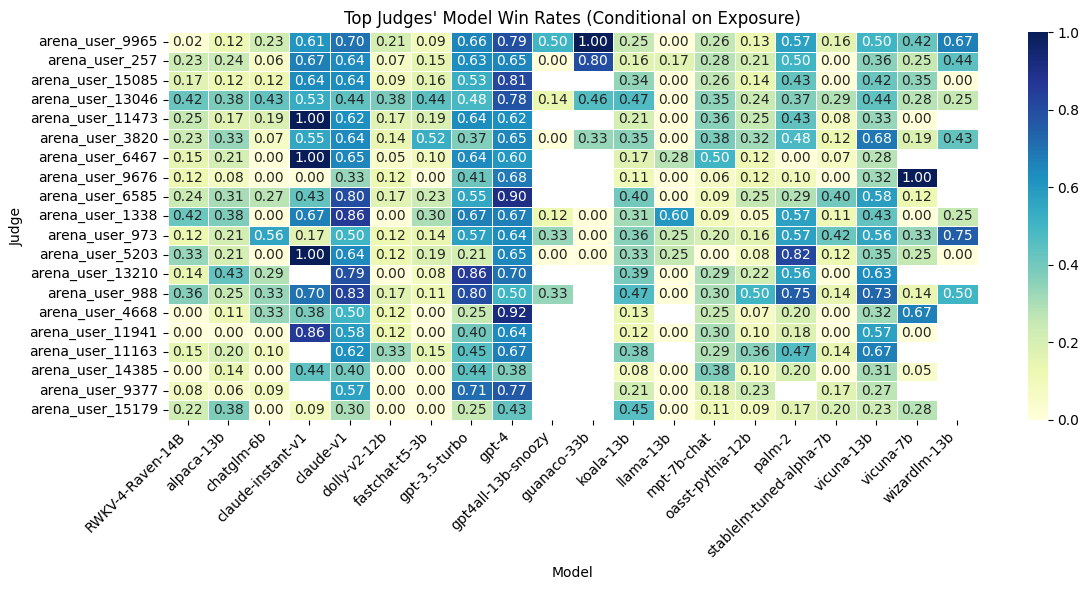

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# get top 20 judges by number of evaluations
top_judges = model_seen_df.sum(axis=1).sort_values(ascending=False).head(20).index
filtered_win_rate = model_win_rate.loc[top_judges]

plt.figure(figsize=(12, 6))
sns.heatmap(filtered_win_rate, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title("Top Judges' Model Win Rates (Conditional on Exposure)")
plt.xlabel("Model")
plt.ylabel("Judge")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# I also want to have an idea of the topic distribution for each judge
# For this, I will run a topic model on the prompts and then use kmeans to assign embedding clusters to topics

from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# remove stopwords
stop_words = ENGLISH_STOP_WORDS
def remove_stopwords(text):
    return " ".join(w for w in text.split() if w.lower() not in stop_words)

data['clean_prompt'] = data['prompt'].apply(remove_stopwords)

# embed all prompts
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(data['clean_prompt'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/1032 [00:00<?, ?it/s]

In [ ]:
# cluster embeddings into “topics”
n_topics = 10
kmeans = KMeans(n_clusters=n_topics, random_state=0)
data['topic_cluster'] = kmeans.fit_predict(embeddings)

# compute per-judge topic distributions
topic_dist = (
    data
    .groupby(['judge','topic_cluster'])
    .size()
    .unstack(fill_value=0)
)

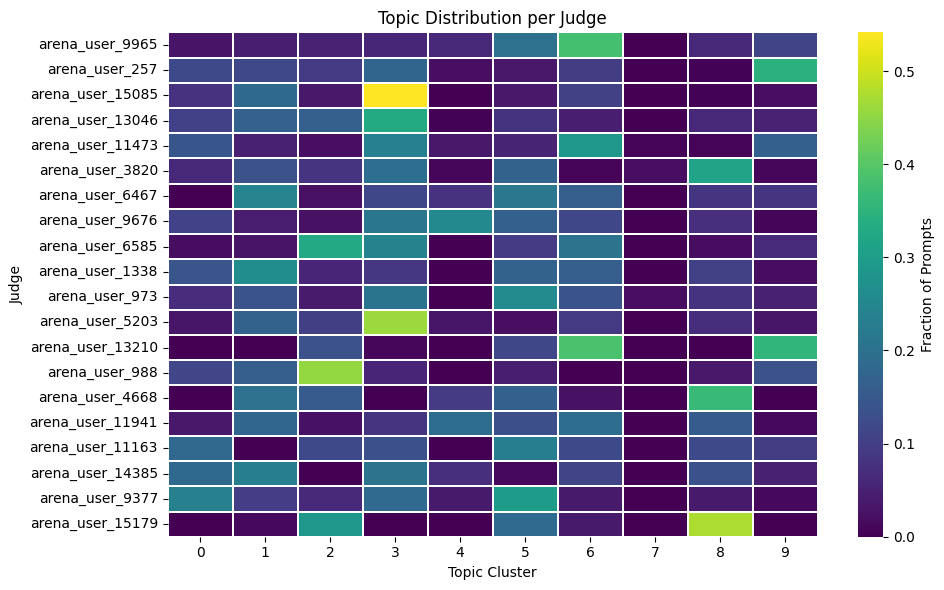

In [ ]:
# normalize to get percentages
topic_dist_pct = topic_dist.div(topic_dist.sum(axis=1), axis=0)

# filter to the top 20 judges by number of evaluations
top_judges = data['judge'].value_counts().head(20).index
td = topic_dist_pct.loc[top_judges]

plt.figure(figsize=(10, 6))
sns.heatmap(
    td,
    cmap="viridis",
    cbar_kws={'label': 'Fraction of Prompts'},
    linewidths=0.3
)
plt.xlabel("Topic Cluster")
plt.ylabel("Judge")
plt.title("Topic Distribution per Judge")
plt.tight_layout()
plt.show()

In [ ]:
# I also want to understand what each topic represents
# For this, I use TF-IDF to find the most distinctive words in each cluster

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# fitting a TF–IDF vectorizer on the cleaned prompts
vectorizer = TfidfVectorizer(
    max_df=0.9,
    min_df=5,
    stop_words='english'
)
tfidf = vectorizer.fit_transform(data['clean_prompt'])
feature_names = vectorizer.get_feature_names_out()

# for each cluster, find the top n terms
top_n = 10
for cluster in sorted(data['topic_cluster'].unique()):
    idxs = np.where(data['topic_cluster'] == cluster)[0]

    cluster_sums = tfidf[idxs].sum(axis=0).A1
    top_indices = cluster_sums.argsort()[-top_n:][::-1]
    top_terms = [feature_names[i] for i in top_indices]
    print(f"Cluster {cluster} top terms:", ", ".join(top_terms))

    print(f"Cluster {cluster} size:", len(idxs))

    samples = data.loc[data['topic_cluster']==cluster, 'prompt'] \
                  .sample(3, random_state=0).tolist()
    print("Examples:", samples, "\n")

Cluster 0 top terms: capital, president, world, tell, country, history, city, day, did, moon
Cluster 0 size: 2840
Examples: ['What are Reimu Hakurei’s powers? ', "let's imagine that we live in a world where pi = 3. what would this world look like?", 'Do know the person Viswanadhapalli Naga Ravi'] 

Cluster 1 top terms: explain, does, use, difference, best, data, make, write, list, create
Cluster 1 size: 6474
Examples: ['Please summarise this article:\n\nIn the beer gardens of Berlin, night trains are a conversation topic almost as hot as how to get the Berghain bouncers to let you into their nightclub. (“Be a single man, be ‘alright’-looking, don’t smile,” I’m told.)\n\nA Nightjet train of Austrian Federal Railways OeBB departs as it resumes travel operation amid the coronavirus disease (COVID-19) outbreak, at the main station in Vienna, Austria, May 24,2021. REUTERS/Lisi Niesner<br>2FWWD8F A Nightjet train of Austrian Federal Railways OeBB departs as it resumes travel operation amid t

In [ ]:
exposures = (
    data
    .groupby(['judge','topic_cluster'])
    .size()
    .unstack(fill_value=0)
)

wins = (
    data[data['winner'].isin(['model_a','model_b'])]
    .groupby(['judge','topic_cluster'])
    .size()
    .unstack(fill_value=0)
)

win_rate = wins.div(exposures).loc[:, [2, 3]]
win_rate.columns = ['cluster_2_win_rate','cluster_3_win_rate']

mask = (exposures[2] > 0) & (exposures[3] > 0)
filtered = win_rate.loc[mask]

print(filtered.head(10))


                  cluster_2_win_rate  cluster_3_win_rate
judge                                                   
arena_user_1000                  1.0            0.666667
arena_user_10083                 1.0            1.000000
arena_user_10121                 1.0            0.333333
arena_user_10128                 1.0            0.000000
arena_user_1016                  1.0            0.666667
arena_user_10185                 1.0            1.000000
arena_user_10213                 0.0            0.500000
arena_user_10214                 0.0            1.000000
arena_user_10236                 1.0            0.000000
arena_user_10251                 0.6            0.666667


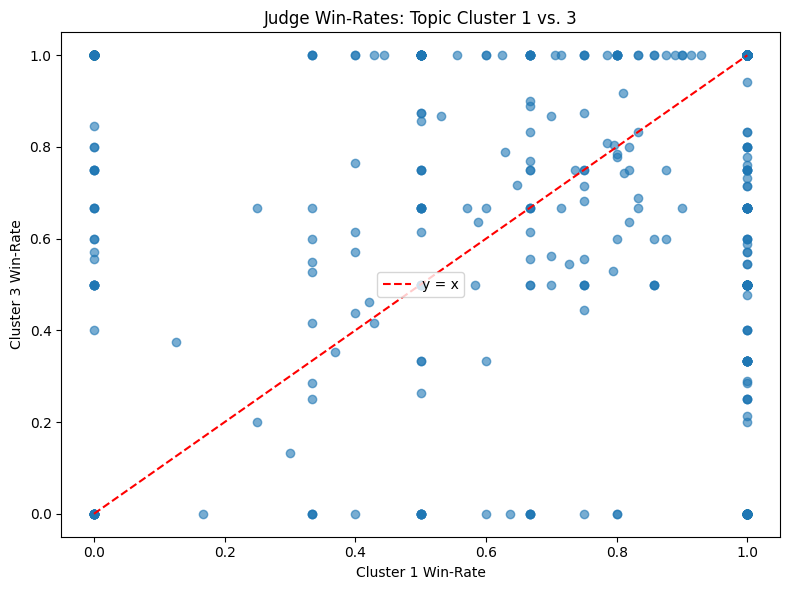

In [ ]:
win_rate = wins.div(exposures).loc[:, [1, 3]]
win_rate.columns = ['cluster_1_win_rate', 'cluster_3_win_rate']

valid = exposures[[1, 3]].min(axis=1) > 0
win_rate_filtered = win_rate.loc[valid]

plt.figure(figsize=(8, 6))
plt.scatter(
    win_rate_filtered['cluster_1_win_rate'],
    win_rate_filtered['cluster_3_win_rate'],
    alpha=0.6
)
plt.plot([0, 1], [0, 1], 'r--', label='y = x')
plt.xlabel("Cluster 1 Win-Rate")
plt.ylabel("Cluster 3 Win-Rate")
plt.title("Judge Win-Rates: Topic Cluster 1 vs. 3")
plt.legend()
plt.tight_layout()
plt.show()


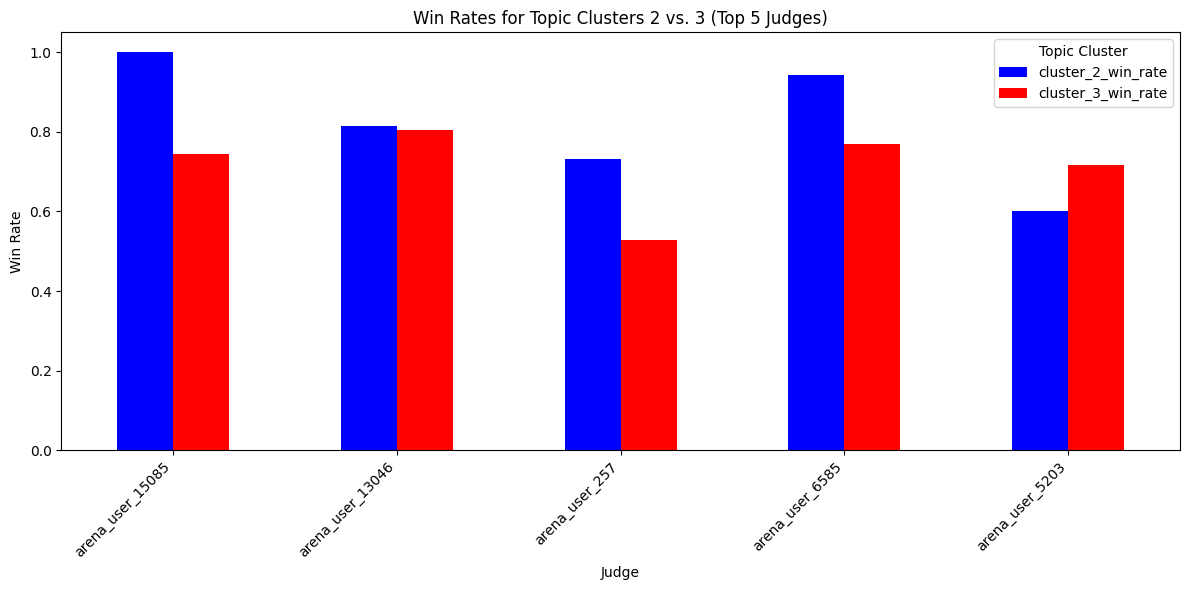

In [ ]:
top_judges = exposures.loc[mask, [2, 3]].sum(axis=1).sort_values(ascending=False).head(5).index
plot_data = filtered.loc[top_judges]

fig, ax = plt.subplots(figsize=(12, 6))
plot_data.plot(
    kind='bar',
    color=['blue', 'red'],
    ax=ax
)
ax.set_xlabel("Judge")
ax.set_ylabel("Win Rate")
ax.set_title("Win Rates for Topic Clusters 2 vs. 3 (Top 5 Judges)")
ax.legend(title="Topic Cluster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



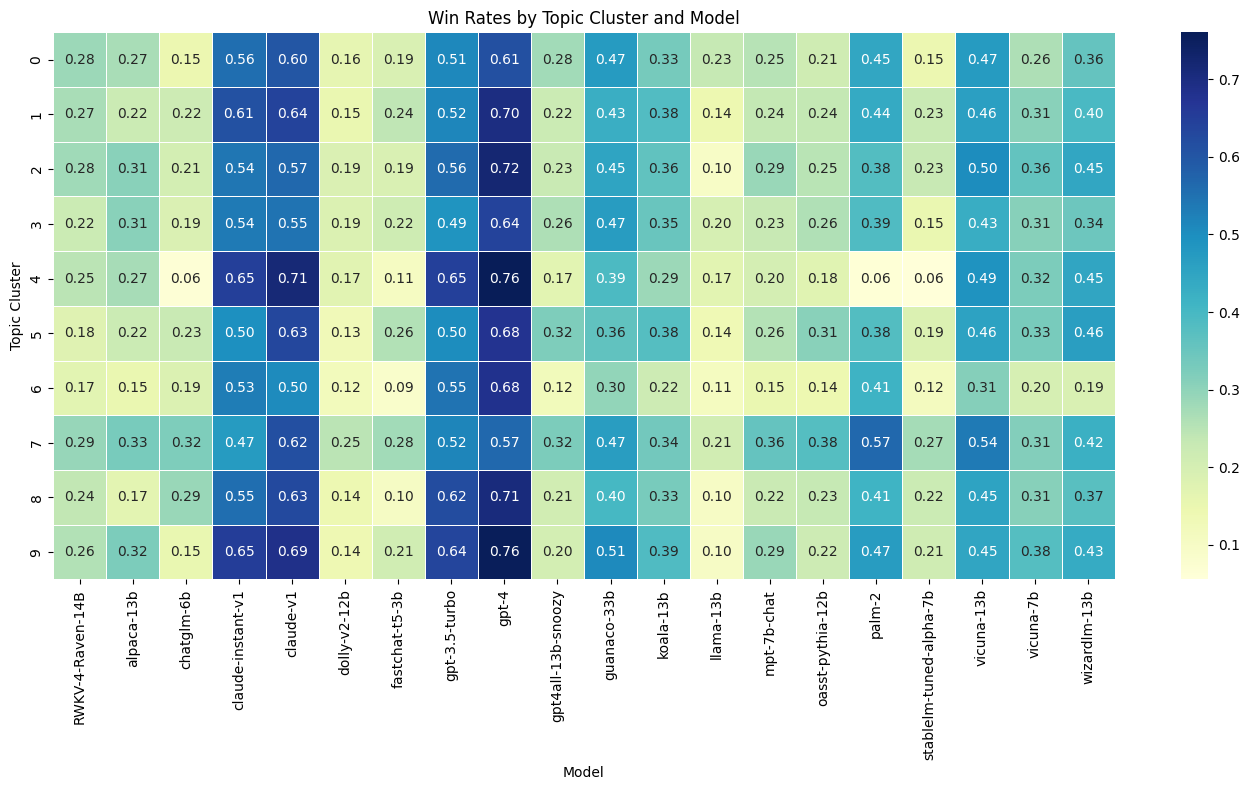

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_main = data

exposures = (
    df_main
    .melt(id_vars=['topic_cluster'], value_vars=['model_a', 'model_b'], value_name='model')
    .groupby(['topic_cluster', 'model'])
    .size()
    .unstack(fill_value=0)
)

wins = (
    df_main[df_main['winner'].isin(['model_a', 'model_b'])]
    .assign(
        winner_model=lambda x: x.apply(
            lambda r: r['model_a'] if r['winner']=='model_a' else r['model_b'], axis=1
        )
    )
    .groupby(['topic_cluster', 'winner_model'])
    .size()
    .unstack(fill_value=0)
)

win_rate = wins.div(exposures)

plt.figure(figsize=(14, 8))
sns.heatmap(
    win_rate,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title("Win Rates by Topic Cluster and Model")
plt.xlabel("Model")
plt.ylabel("Topic Cluster")
plt.tight_layout()
plt.show()
